<a href="https://colab.research.google.com/github/berkaykarr/EmployeeManager.mvc/blob/master/Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the requriements

In [159]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Analysis

In [142]:
turkce_stop_words = [
    "ve", "bir", "bu", "de", "da", "ile", "için", "ama", "fakat", "ancak",
    "veya", "ki", "hem", "her", "şu", "o", "biz", "siz", "onlar", "çok", "az",
    "daha", "en", "gibi", "ise", "eğer", "çünkü", "ile", "mi", "mı", "mu", "mü",
    "şey", "bile", "ya", "ya da", "kadar", "sonra", "önce", "değil", "olarak"
]

In [100]:
#import datas
spam_df = pd.read_excel("TurkishSpam.xlsx", engine='openpyxl')


In [101]:
spam_df.sample(20)
#kodu test ettim

,Message,Category,Unnamed: 2
397,Ebedi Sevgili...Bugün O_x0092_nun için birşey ...,ham,NaN
14,"Sayın Müdürüm,Öncelikle size ve çalışma arkada...",spam,NaN
104,Esse Creative (@EsseCreative) adl=C4=B1 ki=C5=...,spam,NaN
139,Değerli Sınav Merkezi Yöneticilerimiz;Kamera k...,spam,NaN
721,"S.A. C=FCneyt abi,\n\nSa=F0l=FDkNET g=F6nderim...",ham,NaN
801,Akademik Bili=FEim 2013\n ...,ham,NaN
637,"Eki yüklemeyi unutmuşum, proje konusu ektedir....",ham,NaN
47,###########################################\nT...,spam,NaN
496,<html><div style='background-color:'><P><BR><B...,ham,NaN
12,İlgili makamaKpss ile kamu personeli alımların...,spam,NaN


In [114]:
spam_df['spam'] = spam_df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
#added a new coloumn for spam if the message is spam it will be 1 and if it is not it will be 0

In [98]:
#testing it if it is working
spam_df.sample(10)

,Message,Category,spam
254,>>>>> PRAT=DDK ve KOLAY F=DDNANS E=D0=DDT=DD...,spam,1
207,BÄ°LGÄ° EDÄ°NME BAÅ_x009e_VURUSU FORMU\n\n(Ger...,spam,1
501,Başbakan'a mektup \n\n\n\nHani derler ya; '......,ham,0
273,Sayın Yetkili ;Hızla büyüyen ve gelişmekte ola...,spam,1
655,Evet CNN de 5n1k yayınlarınızı ve Facebooktaki...,ham,0
720,S.A;Devc 'ye : Bir hastamıza gebe başlatıım ve...,ham,0
164,D=DDKS=DDYON ve G=DCZEL KONU=DEMA E=F0itim Set...,spam,1
343,tez önerini bir daha gönder.Bunu değiştiremiyo...,ham,0
80,&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbs...,spam,1
677,a.s.Eğer çatlak fıstıkları ayırt eden cihaz ku...,ham,0


In [82]:
spam_df.shape

(826, 4)

In [104]:
spam_df.columns

Index(['Message', 'Category', 'Unnamed: 2'], dtype='object')

In [108]:
spam_df = spam_df.drop(columns=['Unnamed: 2'],axis='columns')
#Unnamed columunu kaldırdım


In [110]:
spam_df = spam_df.dropna()
#Null değerindeki veriye sahip olan satırları kaldırdım

In [109]:
spam_df.shape
#sütun kaldırdıktan sonra ve null değerindeki satırları kaldırdıktan sonra kaç tane satır ve sütun var diye kontrol ettim

(826, 2)

In [166]:
spam_df.sample(20)
#rastgele 20 örnek gösterdim.

,Message,Category,spam,length
356,karadeniz'de bir kadının çok sevgilisi varmış....,ham,0,1375
40,bizler 250.000'e yakın i̇ktisadi ve i̇dari bil...,spam,1,3358
350,"to: ademkarabulut17@hotmail.com, ahmet_gok06@h...",ham,0,5051
13,sayın yetkili ;\nhızla büyüyen ve gelişmekte o...,spam,1,2602
154,saygılarımlaçetin öğütşule yayın dağıtım pazar...,spam,1,444
720,s.a;devc 'ye : bir hastamıza gebe başlatıım ve...,ham,0,409
738,"<html>\n<head>\n<meta http-equiv=3d""content-ty...",ham,0,9624
32,i̇lgili makama\nbakanlık birimlerinde ve bir ç...,spam,1,1136
786,biraz literatür taraması daha yapalım.şimdi ya...,ham,0,2437
217,sayın yetkili ;gelişen ve değişen günümüztekno...,spam,1,1506


In [116]:
spam_df["Category"].value_counts()
#kategorilerin değerlerini çıkartıp kaç tane spam kaç tane normal mesaj olduğunu inceledim.

,count
Category,
ham,495
spam,329


Not a Spam Email Ratio: 60.0 %
Spam Email Ratio: 40.0 %


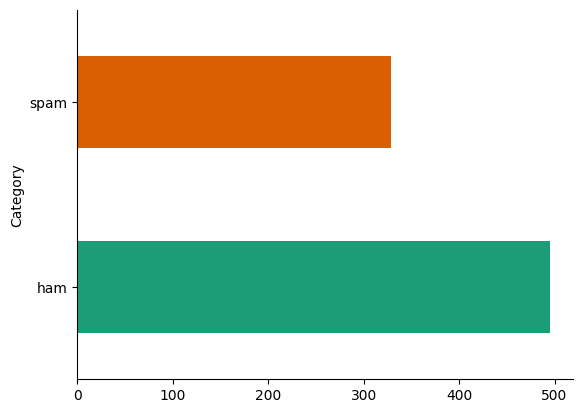

In [125]:
#Yüzdelik olarak spam ve normal mesajları yazdırdım ve renkli grafikte gösterdim.
print("Not a Spam Email Ratio:",round(len(spam_df[spam_df['spam']==0])/len(spam_df['spam']),2)*100,"%")
print("Spam Email Ratio:",round(len(spam_df[spam_df['spam']==1])/len(spam_df['spam']),2)*100,"%")
spam_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [117]:
spam_df.isnull().sum()

,0
Message,0
Category,0
spam,0


Feature Engineering

In [126]:
#yeni bir column ekledim ve bu sayede her mesajın uzunluğunu görebilirsiniz.
spam_df['length'] = spam_df['Message'].apply(len)
spam_df.head()

,Message,Category,spam,length
0,Sayın Yetkili ;\n Gelişen ve değişen günümüz ...,spam,1,1563
1,"Sayın Yetkili,\n \n28 Kasım 2010 tarihli KPSS ...",spam,1,617
2,Sayın Yetkili ;\n Gelişen ve değişen günümüz ...,spam,1,1565
3,T.C.\nURLA KAYMAKAMLIĞI\nURLA HAKAN ÇEKEN ANAD...,spam,1,764
4,Sayın Yetkili ;Hızla büyüyen ve gelişmekte ola...,spam,1,2578


In [128]:
# Mesajlarda kullanılan büyük harfleri küçülttüm.
spam_df["Message"] = spam_df["Message"].str.lower()
spam_df.head()

,Message,Category,spam,length
0,sayın yetkili ;\n gelişen ve değişen günümüz ...,spam,1,1563
1,"sayın yetkili,\n \n28 kasım 2010 tarihli kpss ...",spam,1,617
2,sayın yetkili ;\n gelişen ve değişen günümüz ...,spam,1,1565
3,t.c.\nurla kaymakamliği\nurla hakan çeken anad...,spam,1,764
4,sayın yetkili ;hızla büyüyen ve gelişmekte ola...,spam,1,2578


In [129]:
#create train/test split
x_train, x_test, y_train, y_test = train_test_split(spam_df['Message'], spam_df['spam'], test_size=0.25)

In [131]:
#check X, x_train and x_test
print(spam_df['Message'].shape)
print(x_train.shape)
print(x_test.shape)

(824,)
(618,)
(206,)


Feature Extraction

In [156]:
# transform the text data to feature vectors that can be used as an input to the logictic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words=turkce_stop_words, lowercase=True) # Changed 'True' to True

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert y datas to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [148]:
print(x_train_features)

  (0, 12095)	0.4546726575574076
  (0, 37261)	0.4546726575574076
  (0, 11318)	0.4546726575574076
  (0, 5974)	0.2674969891403269
  (0, 34671)	0.31864785999532
  (0, 15931)	0.4546726575574076
  (1, 17451)	0.007177052407831963
  (1, 17039)	0.005957341854885622
  (1, 23180)	0.00603594252767478
  (1, 8738)	0.005264896418341164
  (1, 783)	0.6749559227879949
  (1, 12758)	0.006305149877429477
  (1, 23170)	0.00484795873762574
  (1, 33347)	0.0020705321083862543
  (1, 11798)	0.003653800707948732
  (1, 32698)	0.00410313823040689
  (1, 779)	0.003916646308753705
  (1, 23966)	0.013563820428575037
  (1, 15048)	0.004365983831211863
  (1, 25422)	0.0023621938761218078
  (1, 31345)	0.029735611578822388
  (1, 8356)	0.002978670927442811
  (1, 930)	0.00410313823040689
  (1, 1345)	0.003553871448331942
  (1, 17466)	0.08974451259020928
  :	:
  (617, 32003)	0.17516876422625088
  (617, 28985)	0.10172649794225588
  (617, 5064)	0.20345299588451177
  (617, 20725)	0.1804794645380307
  (617, 20740)	0.09172498847639642


In [145]:
print(x_train)

342    eleştiriler ışığında düzelt.başka bir yere gön...
717    <html><head><meta content=3d"euro.message web ...
290    &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&...
803    jonathan timmis, artificial immune systems'te ...
569    saygıdeğer hocam, yönetim anlayışınız yıllardı...
                             ...                        
46     ------- 2012 t=dcrk=ddye f=ddrma rehber=dd cds...
31     sayın yetkili;\n \n28 kasım 2010 tarihli kpss ...
819    sayın hocam,rektörlük seçimleri ile ilgili kal...
19     anadolu üniversitesi açık öğretim fakültesi mu...
125    e-posta programä±nä±z html'yi desteklemiyor. b...
Name: Message, Length: 618, dtype: object


Modelling

In [153]:
model = LogisticRegression()

In [157]:
model.fit(x_train_features, y_train)

LogisticRegression()

Evulating the Trained Model

In [179]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [183]:
print("Accuracy for training data : ",accuracy_on_training_data)

Accuracy for training data :  0.9239482200647249


In [164]:
prediction_on_testing_data = model.predict(x_test_features)
accuracy_on_testing_data = accuracy_score(y_test, prediction_on_training_data)

In [184]:
print("Accuracy for testing data : ",accuracy_on_testing_data)

Accuracy for testing data :  0.8786407766990292


In [168]:
#Building a Prediction System

def predict(input_mail):
    input_data_features = feature_extraction.transform([input_mail])
    prediction = model.predict(input_data_features)

    if prediction[0] == 1:
        print("Spam")
    else:
        print("Not Spam")

In [170]:
# testing the previous function
example_spam = "Sayın Yetklili ;En fazla mezun veren bölümlerden olan muhasebe bölümü çin daha çok kadro istiyoruz.Her birimiz Mali Müşavir kontrolünde staj tamamladik Bilgisayar kullanımı ve pratiklik konusunda gereken tecrübeye sahibiz.Kurumunuzun talep ettigi personel özelliklerin taşıdığımızı ve muhasebe bölümü olarak;gerek bilgisayar kullanım gerekse mali konular-vergi mevzuat olsun yeterli bilgi ve donanıma sahip mezunlar olduğumuzu bildirmek isteriz.Haziran ataması için kadro talebinizde bunlarıda göz önününde bulundurmanizi rica ederiz.3173 Önlisans Muhasebe Mezunları.."
example_notSpam = "seni çok seviyorum arkadaşım DOSTUM :)))Kuşlar gibi uçmAyı, balıklar gibi yüzmeyi öğrendik ama basit bir sanatı unuttuk. İNsAN gibi YAşamAyı biliYOr musun bu hafta dünYA dostlar haftası bu mesajı sevdiğin doslarına gönder eğer BEN de SENin YAkın arkadaşınsam dostunsam banada Yolla Bunu arkadaşlarına gönder BAkalım kaç Cvp geleCek eğer 7 den fazlAysa çOOKKk sevilen birisisin demektir."
predict(example_spam)
predict(example_notSpam)

Spam
Not Spam
